<a href="https://colab.research.google.com/github/003Palkush/Zeotap/blob/main/Palkush_Dave_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1: Exploratory Data Analysis (EDA) and Business Insights
1. Perform EDA on the provided dataset.
2. Derive at least 5 business insights from the EDA.
○ Write these insights in short point-wise sentences (maximum 100 words per
insight).

Import Dependencies

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the datasets


In [13]:
customers_df = pd.read_csv('/content/Customers.csv')
products_df = pd.read_csv('/content/Products.csv')
transactions_df = pd.read_csv('/content/Transactions.csv')

Display the first few rows of each dataset

In [14]:
print("Customers Dataset:")
print(customers_df.head())

print("\nProducts Dataset:")
print(products_df.head())

print("\nTransactions Dataset:")
print(transactions_df.head())

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

Check for missing values

In [15]:
print("\nMissing Values:")
print("Customers:")
print(customers_df.isnull().sum())
print("\nProducts:")
print(products_df.isnull().sum())
print("\nTransactions:")
print(transactions_df.isnull().sum())


Missing Values:
Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


Descriptive statistics

In [16]:
print("\nDescriptive Statistics:")
print("Transactions:")
print(transactions_df.describe())


Descriptive Statistics:
Transactions:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


Merge datasets for comprehensive analysis

In [17]:
merged_df = transactions_df.merge(customers_df, on='CustomerID', how='left')
merged_df = merged_df.merge(products_df, on='ProductID', how='left')

Data types and basic info

In [18]:
print("\nMerged Dataset Info:")
print(merged_df.info())


Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB
None


Convert date columns to datetime

In [19]:
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])

In [20]:
if 'Price' in merged_df.columns:
    merged_df['Profit'] = merged_df['TotalValue'] - (merged_df['Quantity'] * merged_df['Price'])
else:
    print("Warning: 'Price' column is missing. 'Profit' cannot be calculated.")

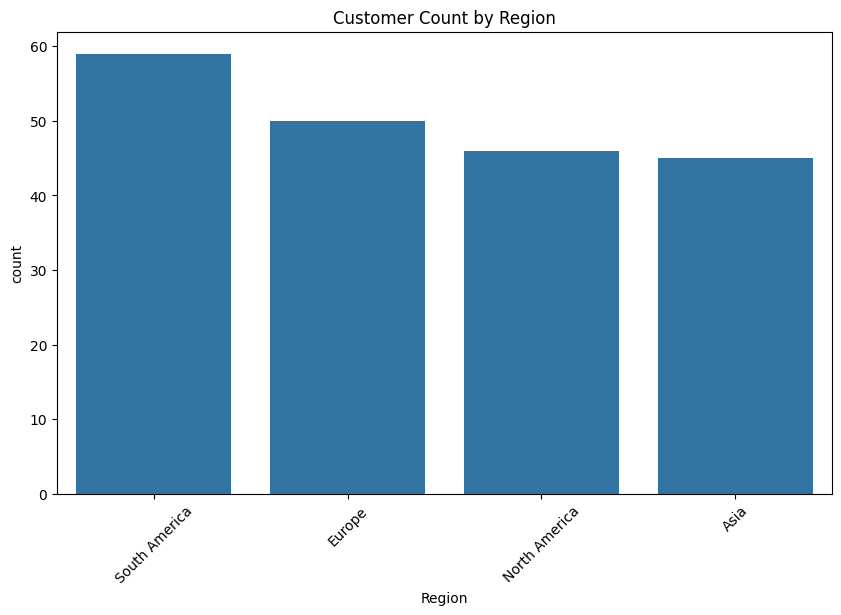

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=customers_df, x='Region', order=customers_df['Region'].value_counts().index)
plt.title('Customer Count by Region')
plt.xticks(rotation=45)
plt.show()



In [22]:


# Convert date columns to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Merge datasets
merged_data = transactions_df.merge(customers_df, on='CustomerID').merge(products_df, on='ProductID')



 1. Regional Performance

               TotalSales  TransactionCount  CustomerCount  \
Region                                                       
Asia            152074.97               218             44   
Europe          166254.63               234             50   
North America   152313.40               244             46   
South America   219352.56               304             59   

               AvgTransactionValue  
Region                              
Asia                    697.591606  
Europe                  710.489872  
North America           624.235246  
South America           721.554474  


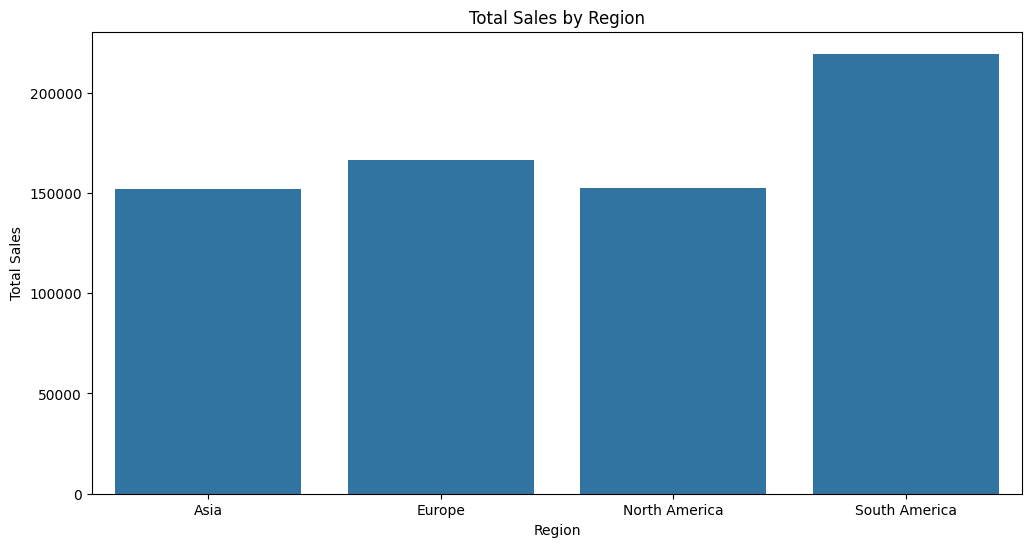

In [23]:
regional_performance = merged_data.groupby('Region').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count',
    'CustomerID': 'nunique'
}).rename(columns={'TotalValue': 'TotalSales', 'TransactionID': 'TransactionCount', 'CustomerID': 'CustomerCount'})
regional_performance['AvgTransactionValue'] = regional_performance['TotalSales'] / regional_performance['TransactionCount']
print(regional_performance)

plt.figure(figsize=(12, 6))
sns.barplot(x=regional_performance.index, y='TotalSales', data=regional_performance.reset_index())
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()



 2. Product Category Dominance

Category
Books          27.847639
Electronics    26.200676
Clothing       24.082859
Home Decor     21.868826
Name: TotalValue, dtype: float64


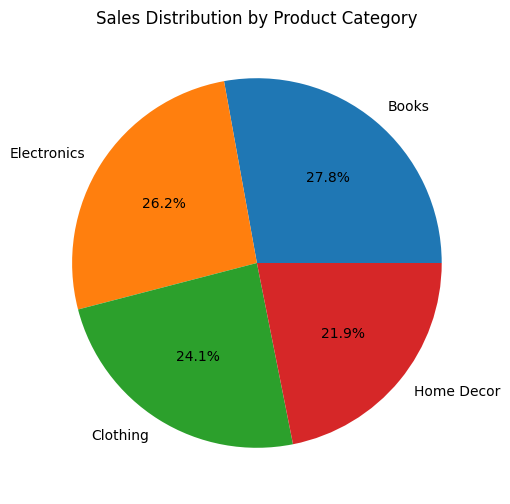

In [24]:
category_sales = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_sales_percentage = category_sales / category_sales.sum() * 100
print(category_sales_percentage)

plt.figure(figsize=(10, 6))
category_sales_percentage.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales Distribution by Product Category')
plt.ylabel('')
plt.show()



3. Customer Segmentation (Pareto Principle)

60.80% of customers generate 80% of revenue


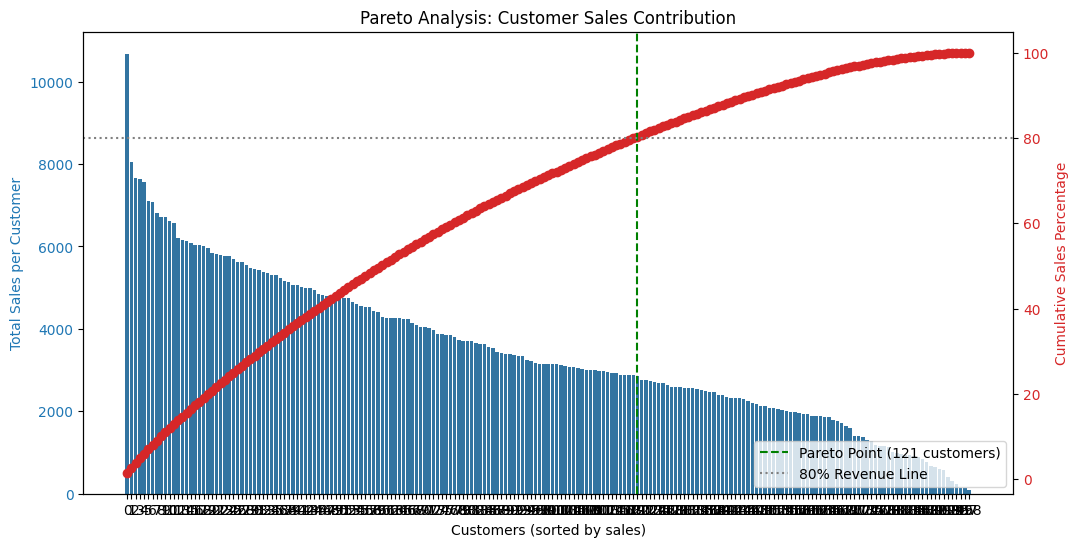

In [29]:
# Group by CustomerID and sum the total sales
customer_sales = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)

# Compute cumulative sales percentage
cumulative_sales_percentage = customer_sales.cumsum() / customer_sales.sum() * 100

pareto_point = (cumulative_sales_percentage >= 80).idxmax()
pareto_index = customer_sales.index.get_loc(pareto_point)
pareto_percentage = (pareto_index + 1) / len(customer_sales) * 100

print(f"{pareto_percentage:.2f}% of customers generate 80% of revenue")

# Plot bar chart for individual customer sales
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
sns.barplot(x=range(len(customer_sales)), y=customer_sales.values, ax=ax1, color=color)
ax1.set_ylabel('Total Sales per Customer', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlabel('Customers (sorted by sales)')
ax1.set_title('Pareto Analysis: Customer Sales Contribution')

# Plot cumulative percentage line
ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(range(len(customer_sales)), cumulative_sales_percentage, color=color, marker='o', linestyle='dashed')
ax2.axvline(pareto_index, color='green', linestyle='--', label=f'Pareto Point ({pareto_index+1} customers)')
ax2.set_ylabel('Cumulative Sales Percentage', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.axhline(80, color='gray', linestyle='dotted', label='80% Revenue Line')

ax2.legend(loc='lower right')
plt.show()




 4. Seasonal Trends

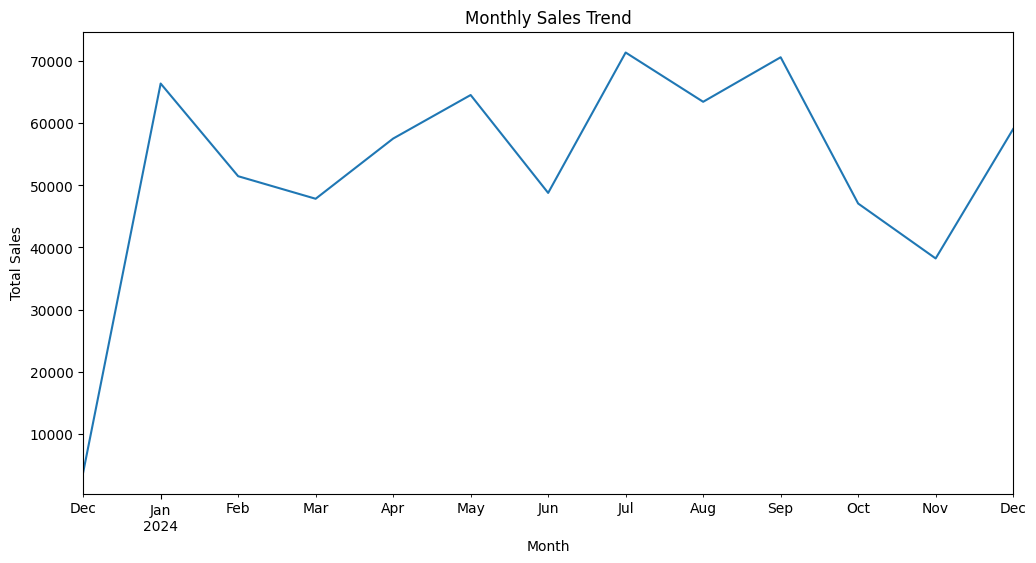

In [26]:
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby('Month')['TotalValue'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()




5. Cross-selling Opportunities

Category
Books          0.800000
Clothing       0.707143
Electronics    1.000000
Home Decor     0.678571
Name: CustomerID, dtype: float64


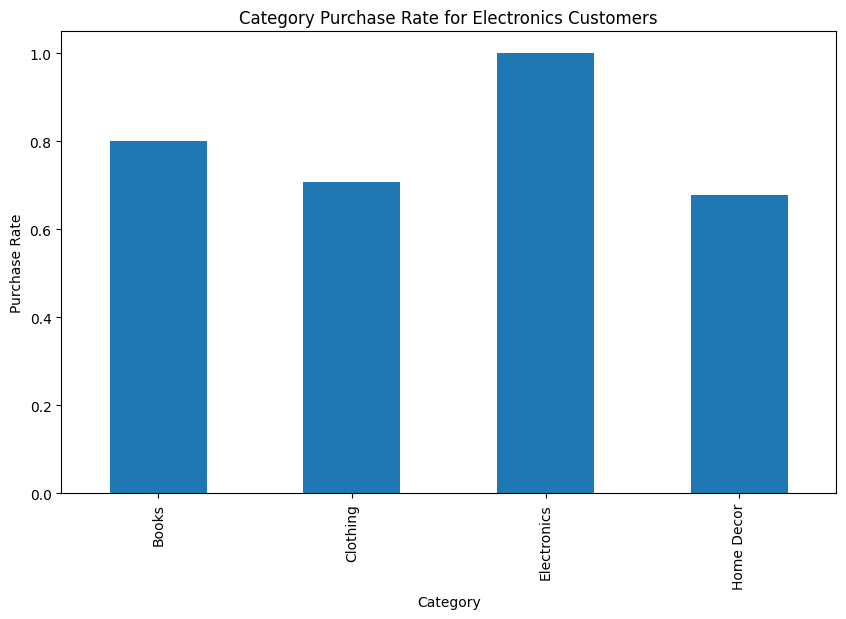

In [27]:
electronics_customers = merged_data[merged_data['Category'] == 'Electronics']['CustomerID'].unique()
electronics_customers_df = merged_data[merged_data['CustomerID'].isin(electronics_customers)]

category_purchase_rate = electronics_customers_df.groupby('Category')['CustomerID'].nunique() / len(electronics_customers)
print(category_purchase_rate)

plt.figure(figsize=(10, 6))
category_purchase_rate.plot(kind='bar')
plt.title('Category Purchase Rate for Electronics Customers')
plt.ylabel('Purchase Rate')
plt.xlabel('Category')
plt.show()